In [1]:
import pandas as pd
import numpy as ny
import json
import nltk
import re
from collections import Counter
import matplotlib.pyplot as plt
#needed

In [41]:
#Dictionary List
#Task 1: Transmissions, Incubation, and Environmental Stability
trans_Incub_enviro = ['transmissible','transmission','immune','infectious','symptomatic','airborne','spread','aerosol','aerosols']
#Task 2: COVID-19 Risk Factors
risk_factors = ['cancer','pregnant','pregnancy','death','critical','infection','diarrhea','risks','aneurysms','pneumonia','respiratory','mortality','severe','deaths','asthma','diabetes','severity','pneumonia']
#Task 3: Vaccines and Therapeutics
vacc = ['vaccination','antibody','vaccine','drug','hydroxychloroquine','drugs','vaccines''medicine''treated']
#Task 4: Virus genetics, orgin, and evolution
gene_ori_evo = ['genome','china','outbreak','genomes','mutations','source','origin','genomic','genes','strain','evolution','genetic','wuhan','protein','proteins']
#Task 5: Medical Care
med_care = ['treatment','antibody','surgical','prevention','antibodies','surgery''treated']
#Task 6: Ethical and social science considerations
Eth_soc = ['ethics','ethical','social','considerations','infants']
#Task 7: Non-pharmaceutical interventions
Non_pharma = ['therapies','telemedicine','isolation','protection','lockdown','treated','distancing','quarantine']
#Task 8: Diagnostics and Surveillance
diagno_surve = ['analysis','model','trial','surveillance','diagnostic','diagnosis','screening','monitoring','identification','imaging','testing','prognosis','estimation','predicting','modelling','detection','study','research']

totalwordlength = len(trans_Incub_enviro)+len(risk_factors)+len(vacc)+len(gene_ori_evo)+len(med_care)+len(Eth_soc)+len(Non_pharma)+len(diagno_surve)
print(totalwordlength)

86


In [ ]:
#Code to read in body text but has not been used yet
class Reader:
    def OpenFile(index, path):
        with open(path) as jsonF:
            content = json.load(jsonF)
            index.body_text = []
            for entry in content['body_text']:
                index.body_text.append(entry['text'])
            index.body_text = '\n'.join(index.body_text)
row = Reader(all_json[0])
print(row)

In [106]:
#Functions
#splits words for abstract
def getWords(index):
    Abstract = smallab.iloc[index]['abstract']
    #Abstract_words = re.split('(.*?\s.*?\s.*?\s.*?)\s', Abstract)
    Abstract_words = re.split('\\W+', Abstract)
    Abstract_words = list(map(lambda x: x.lower(), Abstract_words))
    return Abstract_words
#splits words for journals sources .... pretty useless
def getWordsJ(index):
    J_list = journals.iloc[index]['journal']
    J_words = re.split('(.*?\s.*?\s.*?\s.*?)\s', J_list)
    J_words = list(map(lambda x: x.lower(), J_words))
    return J_words
#splits words for titles
def getWordsT(index):
    Ttles = smallt.iloc[index]['title']
    #titlew = re.split('(.*?\s.*?)\s', Ttles)
    titlew = re.split('\\W+', Ttles)
    titlew = list(map(lambda x: x.lower(), titlew))
    return titlew
#removes words less than 4 characters
def remove(List):
    newlist=[]
    for word in range(len(List)):
        if len(List[word]) >= 4:
            newlist.append(List[word])
    return newlist
#removes words less than 4 characters
def removeJ(List):
    newlist=[]
    for word in range(len(List)):
        newlist.append(List[word])
    return newlist
# Now I am going to run through and do a check for each Dictionary
def checkDict(List,Words):
    matches = []
    for i in Words:
        count = 0 
        for j in set(i):
            for k in List:
                if j == k:
                    count = count + 1
        matches.append(count)
    return matches
#creates the similarity score
def insertTask(task,List):
    percentsim = []
    for i in task:
        temp = round((i/(len(List)))*100,1)
        percentsim.append(temp)
    return percentsim

In [116]:
dataF = pd.read_csv("metadata.csv") 
#loading in the file with pandas instead because spark was having a problem withe column names
#needed
dataF.drop_duplicates(subset ="title", keep = False, inplace = True)
dataF

C:\Users\amacm\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5,13,14,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636.0,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967.0,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972.0,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871.0,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888.0,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158941,ntropr17,e92b7fe272459756c36b53f8727a1c298a9b2a38,Medline; PMC,Studies in neurobiology and aging at the Unite...,10.1002/ajp.1350340109,PMC7159694,31936977.0,no-cc,The seven NIH‐sponsored Regional Primate Resea...,2005-06-02,"King, F. A.; Yarbrough, C. J.",Am J Primatol,NaN,NaN,NaN,document_parses/pdf_json/e92b7fe272459756c36b5...,NaN,https://www.ncbi.nlm.nih.gov/pubmed/31936977/;...,85422857.0
158942,mixxjvte,2166cf20184f1b770a1a6f75682052fcfa42b396,Medline; PMC,Setting out on a fantastic voyage to advance n...,10.1038/s42003-020-0943-z,PMC7192934,32355225.0,cc-by,"We are inviting submissions of articles, persp...",2020-04-30,NaN,Commun Biol,NaN,NaN,NaN,document_parses/pdf_json/2166cf20184f1b770a1a6...,document_parses/pmc_json/PMC7192934.xml.json,https://doi.org/10.1038/s42003-020-0943-z; htt...,216650000.0
158943,t9bt70f2,d2a557f18ca3ad25962a7fce457eff2802f2adaa; a051...,BioRxiv; MedRxiv,Host and infectivity prediction of Wuhan 2019 ...,10.1101/2020.01.21.914044,NaN,NaN,medrxiv,"The recent outbreak of pneumonia in Wuhan, Chi...",2020-01-24,"Guo, Qian; Li, Mo; Wang, Chunhui; Wang, Peihon...",bioRxiv,NaN,NaN,NaN,document_parses/pdf_json/d2a557f18ca3ad25962a7...,NaN,https://doi.org/10.1101/2020.01.21.914044,213133457.0
158944,nhpjvgt4,da516a5f665fcb8a6f3a1fd350bcfa34820d951a,Medline; PMC,Considerations for Safety in the Use of System...,10.1111/dth.13687,PMC7283778,32458536.0,no-cc,"Coronavirus disease 2019 (COVID‐19), is respon...",2020-05-27,"Ricardo, Jose W.; Lipner, Shari R.",Dermatol Ther,NaN,NaN,NaN,document_parses/pdf_json/da516a5f665fcb8a6f3a1...,NaN,https://doi.org/10.1111/dth.13687; https://www...,218911875.0


In [ ]:
#pretty useless but just going to keep it just in case
journals = dataF[['journal']]
#def getWords(index):
    journal_names = journals.iloc[index]['journal']
    journal_words = re.split('\\W+', journal_names)
    journal_words = list(map(lambda x: x.lower(), journal_words))
    return journal_words

jour = []
for line in range(len(journals)):
    c = getWords(line)
    jour.append(c)
jour

dataF['journal'].Counter().most_common()
frequent = Counter(dataF[['journal']])
frequent.most_common()
df = dataF.dropna(subset=['journal'])
df['journal'].value_counts().max()

In [ ]:
#not done coding
i =0 
columnname = 'pmc_json_files'
for i in pmc_jsonF.range(i,len(pmc_jsonF)):
    with open(pmc_jsonF['pmc_json_files'].values[i])

In [117]:
ab = dataF[['abstract']]
ab = ab.dropna()
ab.reset_index(drop=True,inplace=True)
titles = dataF[['title']]
titles = titles.dropna()
titles.reset_index(drop=True,inplace=True)
#journals = dataF[['journal']]
#journals = journals.dropna()
#journals.reset_index(drop=True,inplace=True)

In [118]:
len(ab)

104333

In [61]:
#getting cleaned abstract list
smallab = ab.iloc[0:104333]
cleanedablist = []
for line in range(len(smallab)):
    a = getWords(line)
    #acleaned = remove(a)
    #cleanedablist.append(acleaned)
    cleanedablist.append(a)

In [ ]:
#getting cleaned title list
smallt = titles.iloc[0:158897]
cleanedtlist = []
for line in range(len(smallt)):
    t = getWordsT(line)
    tcleaned = remove(t)
    cleanedtlist.append(tcleaned)

In [ ]:
#getting cleaned journal list
smallj = journals.iloc[0:150007]
cleanedjlist = []
for line in range(len(smallj)):
    j = getWordsJ(line)
    jcleaned = remove(j)
    cleanedjlist.append(jcleaned)

In [ ]:
#count for journals
Countj = Counter()
for i in cleanedjlist:
    for j in set(i):
        Countj[j] += 1
Countj.most_common()

In [14]:
#count for abstracts
Count = Counter()
for i in cleanedablist:
    for j in set(i):
        Count[j] += 1
Count.most_common()

[('', 114725),
 ('the', 114590),
 ('of', 114383),
 ('and', 113471),
 ('in', 110705),
 ('to', 108525),
 ('a', 104020),
 ('with', 90333),
 ('for', 89542),
 ('is', 79291),
 ('this', 72326),
 ('that', 71508),
 ('by', 65731),
 ('on', 62266),
 ('as', 61953),
 ('was', 60600),
 ('from', 58133),
 ('were', 57089),
 ('are', 56698),
 ('we', 56425),
 ('be', 55023),
 ('an', 53875),
 ('or', 49354),
 ('results', 46299),
 ('2', 42343),
 ('have', 40939),
 ('at', 40289),
 ('these', 38486),
 ('patients', 38234),
 ('has', 37783),
 ('study', 37602),
 ('1', 35438),
 ('which', 35417),
 ('disease', 35369),
 ('not', 34325),
 ('methods', 32585),
 ('19', 32149),
 ('been', 31238),
 ('virus', 30475),
 ('infection', 29505),
 ('between', 28727),
 ('3', 28716),
 ('covid', 28447),
 ('may', 28019),
 ('can', 27959),
 ('using', 27880),
 ('all', 27720),
 ('also', 27164),
 ('it', 26909),
 ('clinical', 26874),
 ('coronavirus', 25900),
 ('during', 25606),
 ('data', 25392),
 ('respiratory', 25242),
 ('more', 24800),
 ('but', 2

In [48]:
#Dictionary List
#Task 1: Transmissions, Incubation, and Environmental Stability
trans_Incub_enviro = ['transmissible','transmission','immune','infectious','symptomatic','airborne','spread','aerosol','aerosols','asymptomatic','blood','surface','animal','incubation','stability','climate','enviromental','surfaces','contact','sars','cov','covid','outbreak']
#Task 2: COVID-19 Risk Factors
risk_factors = ['cancer','pregnant','pregnancy','death','critical','infections','risks','aneurysms','respiratory','mortality','severe','deaths','asthma','diabetes','severity','pneumonia','chronic','diseases','disease','infection','age','smoking','deaths','sars','cov','covid']
#Task 3: Vaccines and Therapeutics
vacc = ['vaccination','antibody','vaccine','drug','hydroxychloroquine','drugs','vaccines','medicine','treated','therapeutic','therapy','therapeutics','sars','cov','covid']
#Task 4: Virus genetics, orgin, and evolution
gene_ori_evo = ['genome','china','outbreak','genomes','mutations','source','origin','genomic','genes','strain','evolution','genetic','wuhan','protein','proteins','rna','dna','mrnas','sequence','sequences','subgenomic','rnas','mrna','mutation','sars','cov','covid']
#Task 5: Medical Care
med_care = ['treatment','antibody','surgical','prevention','antibodies','surgery','care','telemedicine','medical','insurance','resources','nursing','ventilation','sars','cov','covid']
#Task 6: Ethical and social science considerations
Eth_soc = ['ethics','ethical','social','considerations','underprivileged','racial','race','minority','unethical','policy','legal','societal','bioethics','science','disparities','sars','cov','covid']
#Task 7: Non-pharmaceutical interventions
Non_pharma = ['therapies','isolation','protection','lockdown','distancing','quarantine','prevention','nonpharmaceutical','covering','closure','mask','masks','home','isolate','cover','sars','cov','covid']
#Task 8: Diagnostics and Surveillance
diagno_surve = ['analysis','model','trial','surveillance','diagnostic','diagnosis','screening','monitoring','identification','imaging','testing','prognosis','estimation','predicting','modelling','detection','research','pcr','models','prediction','sars','cov','covid']

totalwordlength = len(trans_Incub_enviro)+len(risk_factors)+len(vacc)+len(gene_ori_evo)+len(med_care)+len(Eth_soc)+len(Non_pharma)+len(diagno_surve)
print(totalwordlength)

165


In [ ]:
#count for titles
Countt = Counter()
for i in cleanedtlist:
    for j in set(i):
        Countt[j] += 1
Countt.most_common()

In [ ]:
mostcommont = pd.DataFrame(Countt.most_common(30), columns=['words', 'count'])
fig, ax = plt.subplots(figsize=(8, 8))
mostcommont.sort_values(by='count').plot.barh(x='words',y='count', ax=ax, color="purple")
plt.show()

In [ ]:
mostcommon = pd.DataFrame(Count.most_common(30), columns=['words', 'count'])
fig, ax = plt.subplots(figsize=(8, 8))
mostcommon.sort_values(by='count').plot.barh(x='words',y='count', ax=ax, color="purple")
plt.show()

In [ ]:
mostcommonj = pd.DataFrame(Countj.most_common(30), columns=['words', 'count'])
fig, ax = plt.subplots(figsize=(8, 8))
mostcommonj.sort_values(by='count').plot.barh(x='words',y='count', ax=ax, color="purple")
plt.show()

In [113]:
#Creating a new DataFrame with the lists of words and Id of paper
Ab_ids = dataF[['cord_uid','abstract']]
Ab_ids = Ab_ids.dropna()
Ab_ids.reset_index(drop=True,inplace=True)
Ab_ids['abstract words'] = cleanedablist
Ab_ids

,cord_uid,abstract,abstract words
0,ug7v899j,OBJECTIVE: This retrospective chart review des...,"[objective, this, retrospective, chart, review..."
1,02tnwd4m,Inflammatory diseases of the respiratory tract...,"[inflammatory, diseases, of, the, respiratory,..."
2,ejv2xln0,Surfactant protein-D (SP-D) participates in th...,"[surfactant, protein, d, sp, d, participates, ..."
3,2b73a28n,Endothelin-1 (ET-1) is a 21 amino acid peptide...,"[endothelin, 1, et, 1, is, a, 21, amino, acid,..."
4,9785vg6d,Respiratory syncytial virus (RSV) and pneumoni...,"[respiratory, syncytial, virus, rsv, and, pneu..."
...,...,...,...
104328,ntropr17,The seven NIH‐sponsored Regional Primate Resea...,"[the, seven, nih, sponsored, regional, primate..."
104329,mixxjvte,"We are inviting submissions of articles, persp...","[we, are, inviting, submissions, of, articles,..."
104330,t9bt70f2,"The recent outbreak of pneumonia in Wuhan, Chi...","[the, recent, outbreak, of, pneumonia, in, wuh..."
104331,nhpjvgt4,"Coronavirus disease 2019 (COVID‐19), is respon...","[coronavirus, disease, 2019, covid, 19, is, re..."


In [107]:
#WARNING----- THIS TAKES A LONG TIME TO RUN -------
#calliing all functions to place articles into bins
task1 = checkDict(trans_Incub_enviro,cleanedablist)
pertask1=insertTask(task1,trans_Incub_enviro)

task2 = checkDict(risk_factors,cleanedablist)
pertask2=insertTask(task2,risk_factors)

task3 = checkDict(vacc,cleanedablist)
pertask3=insertTask(task3,vacc)

task4 = checkDict(gene_ori_evo,cleanedablist)
pertask4=insertTask(task4,gene_ori_evo)

task5 = checkDict(med_care,cleanedablist)
pertask5=insertTask(task5,med_care)

task6 = checkDict(Eth_soc,cleanedablist)
pertask6=insertTask(task6,Eth_soc)

task7 = checkDict(Non_pharma,cleanedablist)
pertask7=insertTask(task7,Non_pharma)

task8 = checkDict(diagno_surve,cleanedablist)
pertask8=insertTask(task8,diagno_surve)



In [84]:
len(pertask4)

104333

In [75]:
permatched = (pertask1+pertask2+pertask3+pertask4+pertask5+pertask6+pertask7+pertask8)
len(permatched)


834664

In [132]:
#creates new columns in the dataframe and writes the dataframe into an excel file
Ab_ids['Transmissions, Incubation, and Environmental Stability'] = pertask1
Ab_ids['Risk Factors'] = pertask2
Ab_ids['Vaccines and Therapeutics'] = pertask3
Ab_ids['Virus genetics, orgin, and evolution'] = pertask4
Ab_ids['Medical Care'] = pertask5
Ab_ids['Ethical and social science considerations'] = pertask6
Ab_ids['Non-pharmaceutical interventions'] = pertask7
Ab_ids['Diagnostics and Surveillance'] = pertask8
Ab_ids['Addition'] = Ab_ids['Diagnostics and Surveillance']+Ab_ids['Non-pharmaceutical interventions']+Ab_ids['Ethical and social science considerations']+Ab_ids['Medical Care']+Ab_ids['Virus genetics, orgin, and evolution']+Ab_ids['Vaccines and Therapeutics']+Ab_ids['Risk Factors']+Ab_ids['Transmissions, Incubation, and Environmental Stability']
#Ab_ids.to_excel('output.xlsx', index=False)

In [133]:
Ab_ids['Transmissions, Incubation, and Environmental Stability']= (Ab_ids['Transmissions, Incubation, and Environmental Stability']/Ab_ids['Addition'])*100
Ab_ids['Risk Factors'] = (Ab_ids['Risk Factors']/Ab_ids['Addition'])*100
Ab_ids['Vaccines and Therapeutics'] = (Ab_ids['Vaccines and Therapeutics']/Ab_ids['Addition'])*100
Ab_ids['Virus genetics, orgin, and evolution'] = (Ab_ids['Virus genetics, orgin, and evolution']/Ab_ids['Addition'])*100
Ab_ids['Medical Care'] = (Ab_ids['Medical Care']/Ab_ids['Addition'])*100
Ab_ids['Ethical and social science considerations'] = (Ab_ids['Ethical and social science considerations']/Ab_ids['Addition'])*100
Ab_ids['Non-pharmaceutical interventions'] = (Ab_ids['Non-pharmaceutical interventions']/Ab_ids['Addition'])*100
Ab_ids['Diagnostics and Surveillance'] = (Ab_ids['Diagnostics and Surveillance']/Ab_ids['Addition'])*100

In [98]:
Ab_ids['Addition'] = Ab_ids['Diagnostics and Surveillance']+Ab_ids['Non-pharmaceutical interventions']+Ab_ids['Ethical and social science considerations']+Ab_ids['Medical Care']+Ab_ids['Virus genetics, orgin, and evolution']+Ab_ids['Vaccines and Therapeutics']+Ab_ids['Risk Factors']+Ab_ids['Transmissions, Incubation, and Environmental Stability']

In [134]:
Ab_ids

,cord_uid,abstract,abstract words,"Transmissions, Incubation, and Environmental Stability",Risk Factors,Vaccines and Therapeutics,"Virus genetics, orgin, and evolution",Medical Care,Ethical and social science considerations,Non-pharmaceutical interventions,Diagnostics and Surveillance,Addition
0,ug7v899j,OBJECTIVE: This retrospective chart review des...,"[objective, this, retrospective, chart, review...",0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.1
1,02tnwd4m,Inflammatory diseases of the respiratory tract...,"[inflammatory, diseases, of, the, respiratory,...",0.000000,58.974359,0.000000,18.974359,0.000000,0.000000,0.000000,22.051282,19.5
2,ejv2xln0,Surfactant protein-D (SP-D) participates in th...,"[surfactant, protein, d, sp, d, participates, ...",44.390244,37.560976,0.000000,18.048780,0.000000,0.000000,0.000000,0.000000,20.5
3,2b73a28n,Endothelin-1 (ET-1) is a 21 amino acid peptide...,"[endothelin, 1, et, 1, is, a, 21, amino, acid,...",0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.5
4,9785vg6d,Respiratory syncytial virus (RSV) and pneumoni...,"[respiratory, syncytial, virus, rsv, and, pneu...",0.000000,65.811966,0.000000,15.811966,0.000000,0.000000,0.000000,18.376068,23.4
...,...,...,...,...,...,...,...,...,...,...,...,...
104328,ntropr17,The seven NIH‐sponsored Regional Primate Resea...,"[the, seven, nih, sponsored, regional, primate...",0.000000,18.377088,15.990453,0.000000,44.868735,0.000000,0.000000,20.763723,41.9
104329,mixxjvte,"We are inviting submissions of articles, persp...","[we, are, inviting, submissions, of, articles,...",0.000000,0.000000,60.909091,0.000000,0.000000,0.000000,0.000000,39.090909,11.0
104330,t9bt70f2,"The recent outbreak of pneumonia in Wuhan, Chi...","[the, recent, outbreak, of, pneumonia, in, wuh...",9.431345,16.019417,9.223301,17.961165,13.037448,7.697642,11.581137,15.048544,144.2
104331,nhpjvgt4,"Coronavirus disease 2019 (COVID‐19), is respon...","[coronavirus, disease, 2019, covid, 19, is, re...",10.520231,31.098266,15.375723,4.277457,14.450867,6.473988,12.832370,4.971098,86.5


In [112]:
Ab_ids.to_excel('output.xlsx', index=False)

In [ ]:
Counttask1 = Counter()
for i in percentsim:
    Counttask1[i] += 1
Counttask1.most_common()

In [ ]:
#creates plot for Task 1
Task1df = pd.DataFrame(Counttask1.most_common()[-6:], columns=['percent', 'count'])
fig, ax = plt.subplots(figsize=(8, 8))
Task1df.sort_values(by='percent').plot.bar(x='percent',y='count', ax=ax, color="blue")
plt.xlabel('Similarity Score', color = 'white')
plt.ylabel('Number of Articles', color = 'white')
plt.xticks(color = 'white')
plt.yticks(color = 'white')
plt.title('Number of Articles and How They Relate to Transmissions, Incubation, and Environmental Stability of COVID-19', color = 'white')
plt.show()

In [ ]:
Task1best = Ab_ids.loc[Ab_ids['Task 1 percent'] == 66.7]
Task1best.reset_index(drop=True,inplace=True)
Task1best.iloc[0]['abstract']

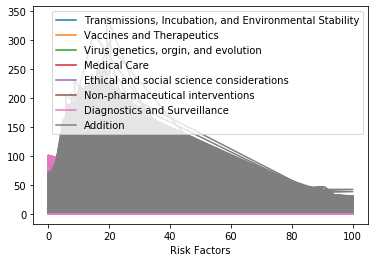